# Week 12 Assignment

Due date: Tue, Nov 10 by 3:30pm (submit on Sakai)

## Readings

Wang RS, Saadatpour A, Albert R. "Boolean modeling in systems biology: an overview of methodology and applications". *Phys Biol.* 2012 Oct;9(5):055001. PubMed PMID: 23011283  [DOI link](http://dx.doi.org/10.1088/1478-3975/9/5/055001).
  
  * Focus primarily on Sections 1 and 2
    


## Problem 1

Answer the following questions based on the readings:


1. What are elements/pieces that are required to define a Boolean network model?

A Boolean network model consists of Boolean logic values (true or false), Boolean logic operators (and, or, not), Boolean variables, a set of nodes, Boolean functions, and a truth table


2.  If you wanted to implement a Boolean network model to represent a specific biological system, where does the information about the network topology and Boolean functions come from?

The values of the Boolean variables are determined by other variables in the network and the Boolean functions. The boolean functions are based on evidence from literature and experimental observations. The dynamics of a Boolean model comes from the transition of one system state to another with further influences by which updating scheme is chosen.


3. What is the “state space” of a Boolean network model?  How big is the state space of a Boolean network of $k$ variables?

A state space, calculated to 2^k where k is each state variable, represents all possible states of the system with all possibilite trajectories of the possible states of the system portrayed in the state transition graph.


4. What is a state transition graph?

A state transition graph shows all possible trajectories in the state space with the states of the system represented by nodes and transitions among the states represented by edges based on the updating scheme.


5. What are “attractors” in Boolean network models?  How do complex attractors differ from fixed points?

As the updating scheme is followed and each nodes' states is updated, eventually the system reaches a fixed point represented by attractors or a set of recurring states. 

Fixed points are time-independent and remain the same regardless of whether an asynchronous or a synchronous updating scheme is used. With complex (loose) attractors, the attractors can be different as the system oscillates among a set of states in a limit cycle of two or more attractors.


6. What sort of biological processes or phenomena might attractors represent?

Attractors correspond to the steady activation states of components, or the long-term behavior of biological or cellular phenotypes.


In [44]:
import numpy as np
from matplotlib import pyplot as plt
import random

## Problem 2

1. Write a set of Boolean functions to represent the network model illustrated below.
 
2. If you simulate the network using a synchronous model, what are the state transition graphs you obtain and how many attractors are you able to identify from your simulations?

3. Consider a deterministic asynchronous model with the updating rules given below. What are the state transition graphs and the attractors?

    - A updates every 1 step
    - B updates every 2 steps
    - C updates every 3 steps
    - D updates every 6 steps
    
   


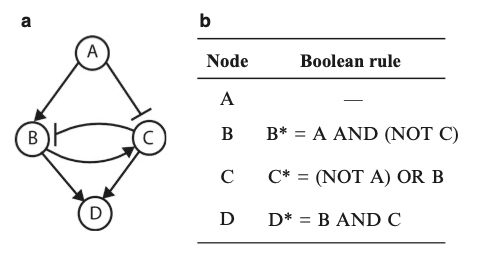

## 2.1

In [45]:
def B1(a,c):
    return a and (not c)

def B2(a,b):
    return (not a) or b

def B3(b,c):
    return b and c

## 2.2

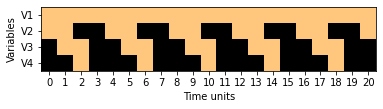

In [46]:
# synchronous model, different starting conditions
V1 = [True]
V2 = [True]
V3 = [False]
V4 = [False]

nsteps = 20

for i in range(nsteps):
    # get the current state of the variables
    v1now = V1[-1]
    v2now = V2[-1]
    v3now = V3[-1]
    v4now = V4[-1]
    
    # find updates
    v1new = v1now
    v2new = B1(v1now, v3now)
    v3new = B2(v1now, v2now)
    v4new = B3(v2now, v3now)
    
    V1.append(v1new)
    V2.append(v2new)
    V3.append(v3new)
    V4.append(v4new)
    
    
V1234 = np.array([V1,V2,V3,V4])

plt.imshow(V1234, interpolation='none', cmap='copper')
plt.xlabel('Time units')
plt.xticks(range(len(V1)))
plt.ylabel('Variables')
plt.yticks(range(4), ['V1','V2','V3','V4'])

pass

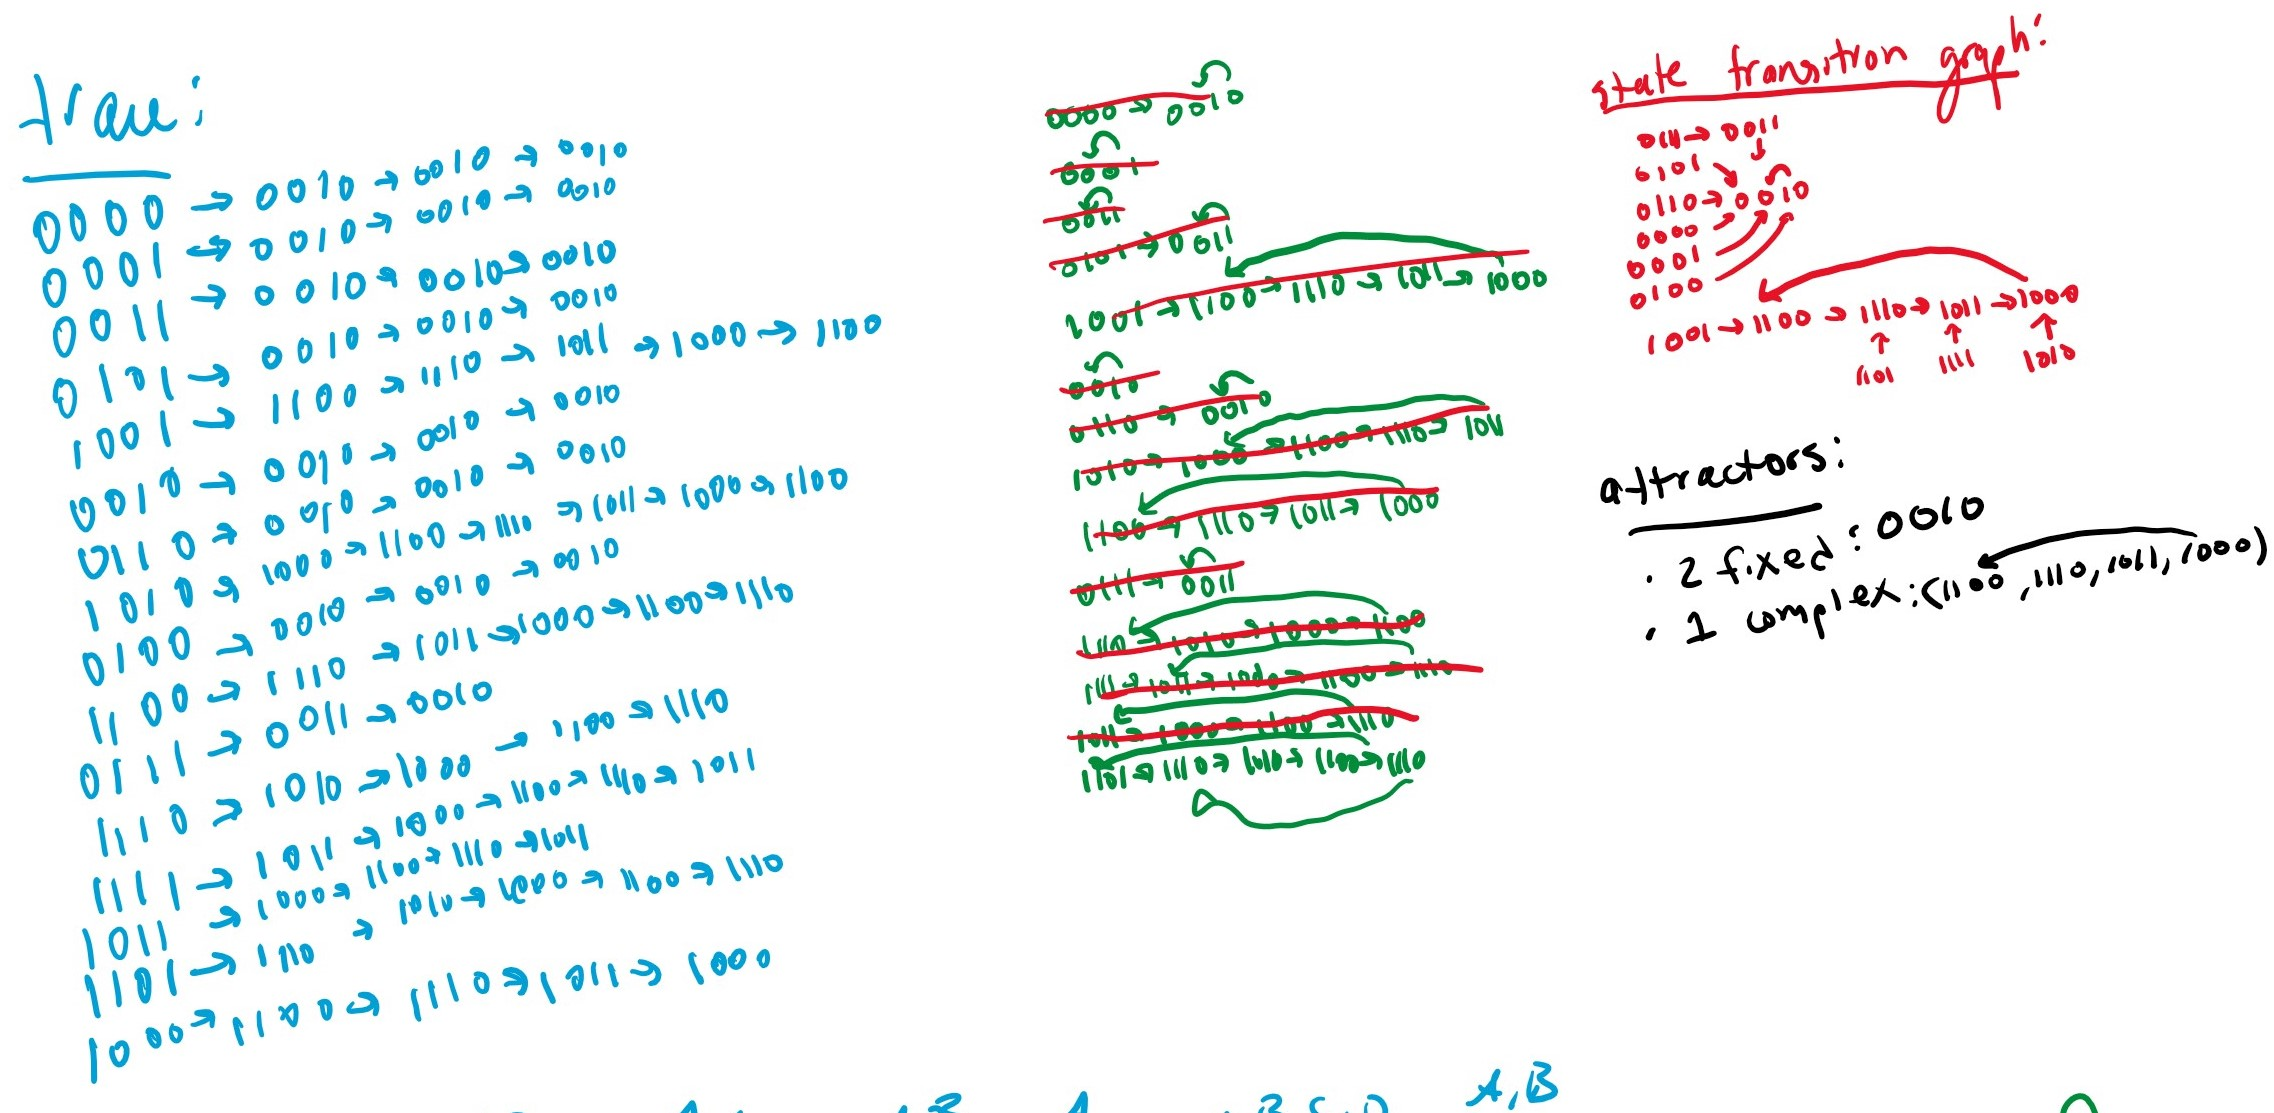

State transition graph, attractors, and trace shown above.

###### 2.3

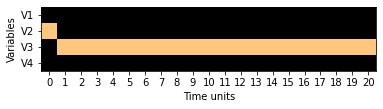

In [43]:
## Asynchronous updating, deterministic, time scale varies
V1 = [False]
V2 = [True]
V3 = [False]
V4 = [False]

nsteps = 20

for i in range(nsteps):
    v1now, v2now, v3now, v4now = V1[-1], V2[-1], V3[-1], V4[-1]
    v1new, v2new, v3new, v4new = v1now, v2now, v3now, v4now
                    
                     # update v1 every 1 steps
    if i % 1 == 0:   # % is the modulus operator in python, look it up if you don't understand it!
        v1new = v1now
        
    if i % 3 == 0:   # update v2 every 2 steps
        v2new = B1(v1now, v3now)
        
    if i % 5 == 0:   # update v3 every 3 steps
        v3new = B2(v1now, v2now)
        
    if i % 6 == 0:   # update v4 every 6 steps
        v4new = B3(v2now, v3now)
            
    V1.append(v1new)
    V2.append(v2new)
    V3.append(v3new)
    V4.append(v4new)
    
    
V1234 = np.array([V1,V2,V3,V4])

plt.imshow(V1234, interpolation='none', cmap='copper')
plt.xlabel('Time units')
plt.xticks(range(len(V1)))
plt.ylabel('Variables')
plt.yticks(range(4), ['V1','V2','V3','V4'])

pass

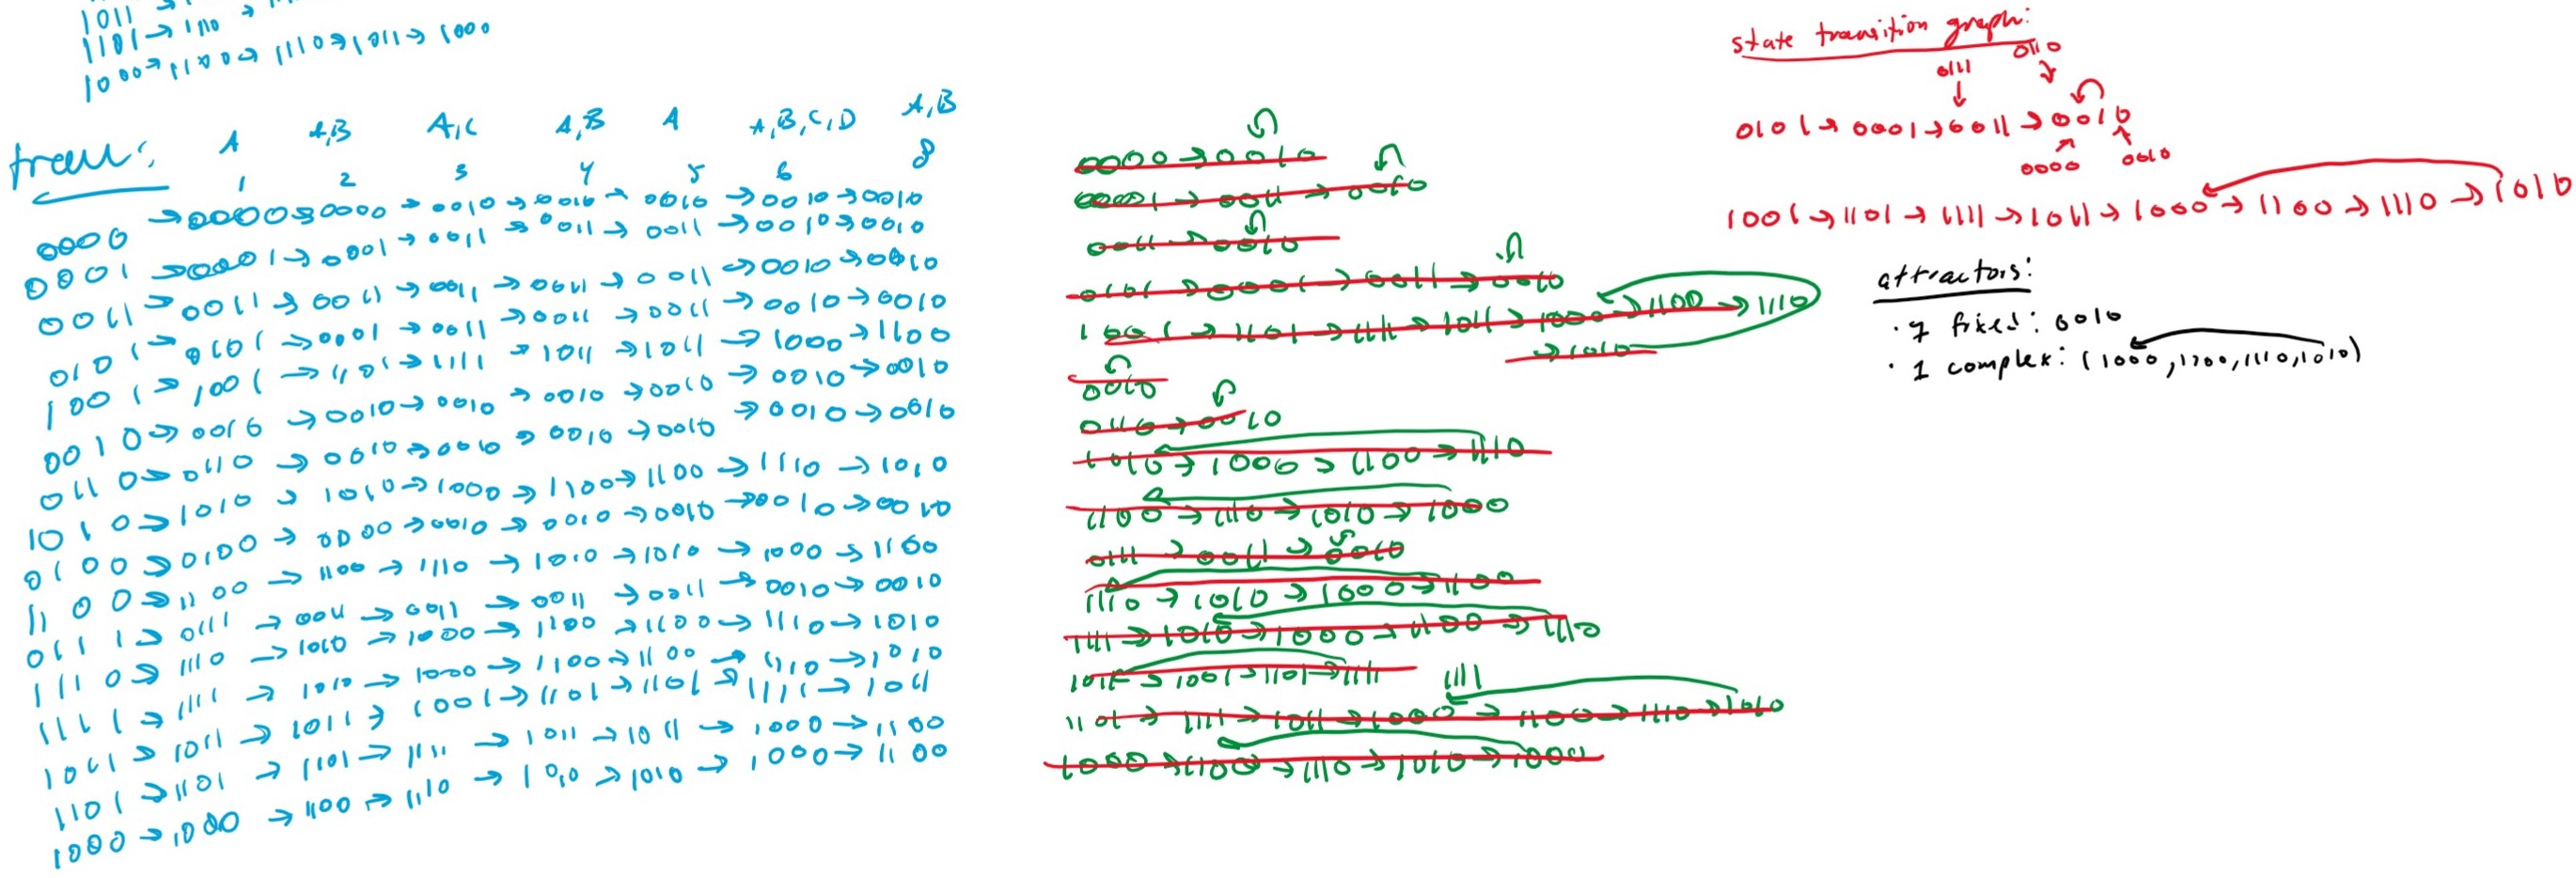

State transition graph, attractors, and trace shown above.